<a href="https://colab.research.google.com/github/visiont3lab/deep-learning-course/blob/main/colab/Intro_to_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started With Python for Deep Learning



* [PyTorch Computer Vision Cookbook](https://github.com/PacktPublishing/PyTorch-Computer-Vision-Cookbook)
* [Nerual Network from sctract](https://www.kickstarter.com/projects/sentdex/neural-networks-from-scratch-in-python?lang=it)
* [Programming Pytorch for Deep Learning](https://www.amazon.it/Programming-Pytorch-Deep-Learning-Applications/dp/1492045357)
* [Deep Learning Sample Code](https://github.com/PacktPublishing)

## Google Colab

## Python Basic Requirements

* List
* array
* dictionary
* function
* class
* python packages and pip

## Pytorch: Installation

* Local (Own Pc)

    Install [python 3.8](https://www.python.org/downloads/)

    ```
    pip3 install virtualenv
    virtualenv env
    source env/bin/activate # Linux - Mac
    source env/Scripts/activate # Windows
    pip install torch torchvision
    ```


* Google Colab

    ```
    pip3 install torch torchvision
    ```
These requirements should be arealdy satisied


In [4]:
# Verify installation
!pip list | grep torch

torch                         1.7.1+cu101   
torchsummary                  1.5.1         
torchtext                     0.3.1         
torchvision                   0.8.2+cu101   


In [5]:
# Change runtime colab type to enable GPU
# Click on Runtime --> Select Change Runtime Type --> Select Hardware Accelarion GPU

import torch
import torchvision
print("Torch Version: ",torch.__version__)
print("Torch Vision Version:", torchvision.__version__)
print("Is Cuda available: ", torch.cuda.is_available())
print("Number of  Cuda device: ", torch.cuda.device_count())
print("Get Cuda Current device: ", torch.cuda.current_device())
print("Get Name of Cuda  device: ", torch.cuda.get_device_name(0))

Torch Version:  1.7.1+cu101
Torch Vision Version: 0.8.2+cu101
Is Cuda available:  True
Number of  Cuda device:  1
Get Cuda Current device:  0
Get Name of Cuda  device:  Tesla K80


In [16]:
! pip3 install torch torchvision

## Pytorch: Tensors

> Tensor: n-dimensional array

* [Pytoch documentation](https://pytorch.org/docs/stable/index.html)
* [List of Pytorch Type](https://pytorch.org/docs/stable/tensors.html)

In [6]:
import torch
x = torch.ones(4,4)
print(x)
print("Shape: ", x.shape)
print("Type : ", x.dtype) # Torch default data type is torch.float32

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
Shape:  torch.Size([4, 4])
Type :  torch.float32


In [7]:
# Specify tensor type
x = 2*torch.ones(1,3,3, dtype=torch.int8)
print(x)
print("Shape: ", x.shape)
print("Type : ", x.dtype)

tensor([[[2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]]], dtype=torch.int8)
Shape:  torch.Size([1, 3, 3])
Type :  torch.int8


In [8]:
# Change tensor type
x = torch.rand(3, dtype=torch.float32) # random uniform 0-1
x = 5*x # Multiply by 5
print("Tensor: %s , Type: %s " % (x, x.dtype))
x = x.type(torch.uint8) # change data type to unit8
print("Tensor: %s , Type: %s " % (x, x.dtype))

Tensor: tensor([0.6724, 2.9342, 2.4417]) , Type: torch.float32 
Tensor: tensor([0, 2, 2], dtype=torch.uint8) , Type: torch.uint8 


In [9]:
# Tensor to numpy array
x = torch.sin( torch.rand(4) + 2*torch.rand(4) )
xnp = x.numpy()
print("Numpy Array: %s , Type: %s " % (xnp, xnp.dtype))

Numpy Array: [0.28262943 0.4665296  0.68194443 0.9914474 ] , Type: float32 


In [10]:
# Numpy array to tensor
import numpy as np
xnp = np.sin( np.random.rand(4) + 2*np.random.rand(4) ) # Float64 by default numpy
x = torch.from_numpy(xnp)
x = x.type(torch.float32)
print("Tensor: %s , Type: %s " % (x, x.dtype))

Tensor: tensor([0.9923, 0.7732, 0.8701, 0.9995]) , Type: torch.float32 


In [11]:
# Moving tensor bettwen cpu and cuda device
# If u do not specify the device the tensorf will be hosted by default on cpu
x = torch.tensor([[1,3,4.4,5.6]])
print("Tensor: %s , Type: %s ,Shape: %s, Device: %s" % (x.tolist(), x.dtype,x.shape,x.device))
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    x = x.to(device)
    print("Tensor: %s , Type: %s ,Shape: %s, Device: %s" % (x.tolist(), x.dtype,x.shape,x.device))


Tensor: [[1.0, 3.0, 4.400000095367432, 5.599999904632568]] , Type: torch.float32 ,Shape: torch.Size([1, 4]), Device: cpu
Tensor: [[1.0, 3.0, 4.400000095367432, 5.599999904632568]] , Type: torch.float32 ,Shape: torch.Size([1, 4]), Device: cuda:0


## Pytorch: Dataset tools

* [Torchvision Datasets](https://pytorch.org/vision/stable/datasets.html)
* [Pytorch transforms augmentation](https://pytorch.org/docs/stable/torchvision/transforms.html)

In [47]:
from keras.datasets import mnist
(x_train,y_train),(x_val, y_val) = mnist.load_data()
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_val = torch.from_numpy(x_val)
y_val = torch.from_numpy(y_val)

In [ ]:
from torchvision import datasets

# Get Mnist Train Datasets inside folder dataset
train_data = datasets.MNIST("./dataset", train=True, download=False)

In [ ]:
# Extract Train data
x_train, y_train = train_data.data, train_data.targets
print("Training Dataset")
print("Shape: %s , Type: %s " % (x_train.shape, x_train.dtype))
print("Shape: %s , Type: %s " % (y_train.shape, y_train.dtype))

In [ ]:
# Get Mnist Validation Datasets inside folder dataset
val_data = datasets.MNIST("./dataset", train=False, download=True)
print(val_data)

In [ ]:
# Extract Validation data
x_val, y_val = val_data.data, val_data.targets
print("Validation Dataset")
print("Shape: %s , Type: %s " % (x_val.shape, x_val.dtype))
print("Shape: %s , Type: %s " % (y_val.shape, y_val.dtype))

In [48]:
# Modify tensor dimension
print("Shape x_train: ", x_train.shape)
print("Shape x_val: ", x_val.shape)
if (len(x_train.shape)==3):
    x_train=x_train.unsqueeze(1) # this nember specify where to  add new tensor
    x_val = x_val.unsqueeze(1)
print("Shape x_train: ", x_train.shape)
print("Shape x_val: ", x_val.shape)

Shape x_train:  torch.Size([60000, 28, 28])
Shape x_val:  torch.Size([10000, 28, 28])
Shape x_train:  torch.Size([60000, 1, 28, 28])
Shape x_val:  torch.Size([10000, 1, 28, 28])


Shape x_grid:  torch.Size([3, 104, 269])
Shape x_grid Resize:  (312, 807, 3)


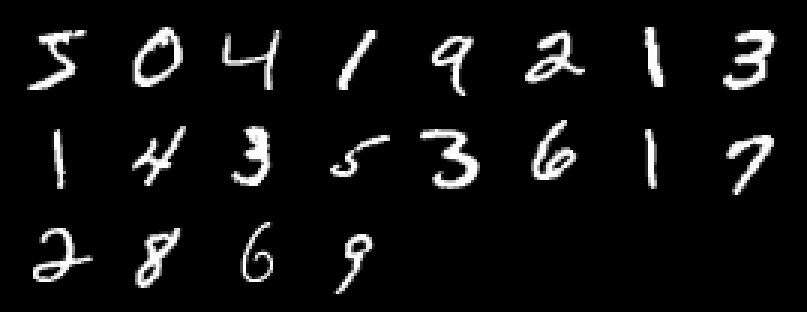

In [49]:
# Display Images
from torchvision import utils 
import matplotlib.pyplot as plt 
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# sets the backend of matplotlib to the 'inline' backend
%matplotlib inline 

def show_matplotlib(img):
    # img is a tensor!
    # Convert tensor to numpy array
    img_np = img.numpy()
    # Reshape image
    img_np = np.transpose(img_np, (1,2,0))
    # Display using matplotlib
    plt.imshow(img_np, interpolation="nearest") #,aspect='auto')
    plt.axis('off')

def show_cv2(img):
    # img is a tensor!
    # Convert tensor to numpy array
    img_np = img.numpy()
    # Reshape image
    img_np = np.transpose(img_np, (1,2,0))
    # Display using opencv
    scale_percent = 300 # percent of original size
    width = int(img_np.shape[1] * scale_percent / 100)
    height = int(img_np.shape[0] * scale_percent / 100)
    dim = (width, height)  
    img_np = cv2.resize(img_np, dim, interpolation = cv2.INTER_AREA)
    print("Shape x_grid Resize: ", img_np.shape)
    cv2_imshow(img_np)

# Let's create a grid image that contains 40 images of the train dataset
x_grid = utils.make_grid(x_train[:20], nrow=8, padding=5)
print("Shape x_grid: ", x_grid.shape)
#show_matplotlib(x_grid)
show_cv2(x_grid)

Shape:  torch.Size([28, 28])
Transformed Shape:  (1, 28, 28)


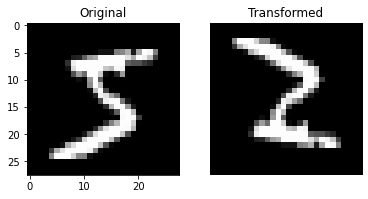

In [ ]:
# Data transformation 
# Pytorch transform: https://pytorch.org/docs/stable/torchvision/transforms.html
# Let's modify images to create some augmented ones
from torchvision import datasets
from torchvision import transforms
import numpy as np
import cv2
import torch
from torchvision import utils 
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow

# Get Mnist Train Datasets inside folder dataset
train_data = datasets.MNIST("./dataset", train=True, download=True)
x_train, y_train = train_data.data, train_data.targets
if (len(x_train.shape)==3):
    x_train=x_train.unsqueeze(1) # this nember specify where to  add new tensor

# Transformation applied to an Image
data_transform = transforms.Compose([
                                    transforms.ToPILImage(),  # Tensor of Numpy array to Pillow
                                    #transforms.RandomHorizontalFlip(p=1), # Pillow transformation
                                    transforms.RandomVerticalFlip(p=1), # Pillow transformation
                                    transforms.ToTensor(),          # Pillow to tensor
                            ])

img = x_train[0][0] # Pillow images (size)
print("Shape: ", img.shape) # Black and white image
img_tr = data_transform(img).numpy()  # range 0-1
print("Transformed Shape: ", img_tr.shape)

# Display images
#cv2_imshow(img)
#cv2_imshow(img_tr[0]*255)
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(img_tr[0], cmap="gray")
plt.title("Transformed")
plt.axis("off")
plt.show()

In [ ]:
# Wrapping Tensors into dataset
from torchvision import datasets
from torchvision import transforms
import numpy as np
import cv2
import torch
from torchvision import utils 
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow
from torch.utils.data import TensorDataset,Dataset

class CustomTensorDataset(Dataset):

    def __init__(self, x,y, transform=None):
        self.x = x
        self.y = y
        self.transform = transform

    def __getitem__(self, index):
        x = self.x[index]
        if self.transform:
            x = 255*self.transform(x)
        y = self.y[index]
        return x, y

    def __len__(self):
        return self.x.shape[0]


# Transformation
# Transformation applied to an Image
data_transform = transforms.Compose([
                                    transforms.ToPILImage(),  # Tensor of Numpy array to Pillow
                                    transforms.RandomApply( 
                                        torch.nn.ModuleList([
                                            transforms.RandomAffine((-10,10), translate=(0.1,0.2), scale=(0.5,1.3)),
                                            transforms.ColorJitter(brightness=(0.3,2), contrast=(0.9,1.1)),
                                        ]),
                                        p=0.5),
                                    #transforms.RandomHorizontalFlip(p=1), # Pillow transformation
                                    #transforms.RandomVerticalFlip(p=1), # Pillow transformation
                                    transforms.ToTensor(),          # Pillow to tensor (scale 0-1)
                            ])
# Loading data
train_data = datasets.MNIST("./dataset", train=True, download=True) #,transform=data_transform) # This transform will only be appluied on data loader
val_data = datasets.MNIST("./dataset", train=False, download=True) #,transform=data_transform)
x_train, y_train = train_data.data, train_data.targets
x_val, y_val = val_data.data, val_data.targets

# Add extra dimension (Preprocessing)
if (len(x_train.shape)==3):
    x_train=x_train.unsqueeze(1) 
if (len(x_val.shape)==3):
    x_val=x_val.unsqueeze(1) 

# Create a Tensor dataset
#train_ds = TensorDataset(x_train, y_train)
#val_ds = TensorDataset(x_val, y_val)
train_ds = CustomTensorDataset(x_train, y_train,data_transform)
val_ds = CustomTensorDataset(x_val, y_val,data_transform)

# Visualization Tensor Dataset
i = 0
for x,y in train_ds:
    print("Y = ", y.item())
    #print("X shape: ", x[0].shape)
    cv2_imshow(x[0].numpy())
    i=i+1
    if i>10:
        break

In [ ]:
# Creating data Loader
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds, batch_size=8)
val_dl = DataLoader(val_ds, batch_size=8)

i = 0
for xb,yb in train_dl:
    #print(xb[0].dtype)
    #print(xb[0].min())
    #print(xb[0].max())
    #print(yb.shape)
    print(yb[2].item())
    cv2_imshow(xb[2][0].numpy())
    i=i+1
    if (i>10):
        break

# Pytorch: Neural Network

In [ ]:
import torch
from torch import nn

# Tensor 64x1000
input_tensor = torch.randn(64,1000)

# Fully connected layer (weight dimension 1000x100)
linear_layer = nn.Linear(1000,100)

# Output 64x100
output_tensor = linear_layer(input_tensor)

print("input_tensor: ", input_tensor.shape) 
print("output_tensor: ", output_tensor.shape) 

input_tensor:  torch.Size([64, 1000])
output_tensor:  torch.Size([64, 100])


In [ ]:
# Let's create our first neural network using nn Sequential Module
import torch
from torch import nn

model = nn.Sequential(
    nn.Linear(4,5),
    nn.ReLU(),
    nn.Linear(5,1)
)
print(model)


Sequential(
  (0): Linear(in_features=4, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
)


# Training Pipeline

In [ ]:
from torch import nn
from torch.utils.data import DataLoader
from torch import optim
import torch
from torch import nn
from torchsummary import summary
#!pip install torchsummary
import torch.nn.functional as F
from torch.utils.data import TensorDataset,Dataset
from torchvision import datasets
from torchvision import transforms

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(1,20,5,1)
        self.conv2 = nn.Conv2d(20,50,5,1)
        self.fc1 = nn.Linear(4*4*50,500)
        self.fc2 = nn.Linear(500,10)
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2) 
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2,2) 
        x = x.reshape(-1,4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.log_softmax(x,dim=1)
        return x

class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet,self).__init__()
        self.fc1 = nn.Linear(28*28,500)
        self.fc2 = nn.Linear(500,100)
        self.fc3 = nn.Linear(100,10)
    def forward(self,x):
        x = x.reshape(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.log_softmax(x,dim=1)
        return x

class CustomTensorDataset(Dataset):

    def __init__(self, x,y, transform=None):
        self.x = x
        self.y = y
        self.transform = transform

    def __getitem__(self, index):
        x = self.x[index]
        if self.transform:
            #x = 255*self.transform(x)
            x = self.transform(x)
        y = self.y[index]
        return x, y

    def __len__(self):
        return self.x.shape[0]

def augmentation_func():
    data_transform = transforms.Compose([
                                    transforms.ToPILImage(),  # Tensor of Numpy array to Pillow
                                    transforms.RandomApply( 
                                        torch.nn.ModuleList([
                                            transforms.RandomAffine((-10,10), translate=(0.1,0.2), scale=(0.5,1.3)),
                                            transforms.ColorJitter(brightness=(0.3,2), contrast=(0.9,1.1)),
                                        ]),
                                        p=0.5),
                                    #transforms.RandomHorizontalFlip(p=1), # Pillow transformation
                                    #transforms.RandomVerticalFlip(p=1), # Pillow transformation
                                    transforms.ToTensor(),          # Pillow to tensor (scale 0-1)
                            ])
    return data_transform

def metrics_batch(target, output):
    # obtain output class
    pred = output.argmax(dim=1, keepdim=False)
    # compare output class with target class
    #corrects = pred.eq(target.view_as(pred)).sum().item()
    corrects = torch.sum(pred == target)
    #print("%s/%s" %(corrects.item(),len(pred)))
    return corrects

def loss_batch(loss_func, xb,yb,yb_h, opt=None):
    # obtain loss
    loss = loss_func(yb_h, yb)
    # obtain permormance metric 
    metric_b = metrics_batch(yb,yb_h)
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
    return loss.item(), metric_b

def loss_epoch(model, loss_func, dataset_dl, opt,device):
    loss = 0.0
    metric = 0.0
    len_data = len(dataset_dl.dataset)

    # Get batch data
    for xb,yb in dataset_dl:    
        # Send to cuda the data (batch size)
        xb = xb.type(torch.float32).to(device)
        yb = yb.to(device)

        # obtain model output 
        yb_h = model(xb)

        # Loss and Metric Calculation
        loss_b, metric_b = loss_batch(loss_func, xb,yb,yb_h,opt)
        loss += loss_b
        if metric_b is not None:
            metric+=metric_b 
    
    loss /=len_data
    metric /=len_data
    return loss, metric

def train_val(epochs, model, loss_func, opt, train_dl,val_dl,device):
    for epoch in range(epochs):
        model.train()
        train_loss,train_metric = loss_epoch(model, loss_func, train_dl, opt,device)
        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl,opt=None,device=device)
        accuracy = 100*val_metric
        print("epoch: %d, train_loss: %.6f, val loss: %.6f, accuracy: %.2f" % (epoch,train_loss, val_loss,accuracy))

# Setup GPU Device
device = torch.device("cpu")
if torch.cuda.is_available():
    device = torch.device("cuda:0")

# Load and Preprocess data 
train_data = datasets.MNIST("./dataset", train=True, download=True) 
val_data = datasets.MNIST("./dataset", train=False, download=True)
x_train, y_train = train_data.data, train_data.targets
x_val, y_val = val_data.data, val_data.targets
if (len(x_train.shape)==3):
    x_train=x_train.unsqueeze(1) 
if (len(x_val.shape)==3):
    x_val=x_val.unsqueeze(1) 

# Transformation
transform_aug = augmentation_func()
train_ds = CustomTensorDataset(x_train, y_train,None)
val_ds = CustomTensorDataset(x_val, y_val,None)
#train_ds = TensorDataset(x_train, y_train)
#val_ds = TensorDataset(x_val, y_val)

# Create Data loader
train_dl = DataLoader(train_ds, batch_size=128)
val_dl = DataLoader(val_ds, batch_size=128)

# Define Model, Loss , Optimizer
#model = SimpleNet()
model = Net()
model.to(device)
#print(model)
# By default model is hosted on CPU
print("Model Parameter Device: ", next(model.parameters()).device)
summary(model, input_size=tuple(x_train.shape[1:])) # (1,28,28)
loss_func = nn.NLLLoss(reduction="sum") # negative log-likelihood function.
opt = optim.Adam(model.parameters(), lr=1e-4)

# Train
num_epochs = 5
train_val(num_epochs,model, loss_func,opt, train_dl, val_dl,device)

# Save Models (It save last weights)
path2weigths="./weights.pt"
torch.save(model.state_dict(),path2weigths)

Model Parameter Device:  cuda:0
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 20, 24, 24]             520
            Conv2d-2             [-1, 50, 8, 8]          25,050
            Linear-3                  [-1, 500]         400,500
            Linear-4                   [-1, 10]           5,010
Total params: 431,080
Trainable params: 431,080
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.12
Params size (MB): 1.64
Estimated Total Size (MB): 1.76
----------------------------------------------------------------
epoch: 0, train_loss: 0.412631, val loss: 0.152888, accuracy: 95.06
epoch: 1, train_loss: 0.083941, val loss: 0.081272, accuracy: 97.36
epoch: 2, train_loss: 0.052074, val loss: 0.055181, accuracy: 98.16
epoch: 3, train_loss: 0.034942, val loss: 0.050851, accuracy: 

## Deploy Pipeline

Prediction:  7


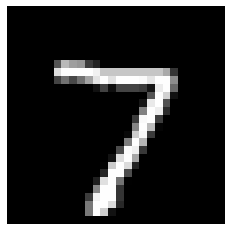

Prediction:  2


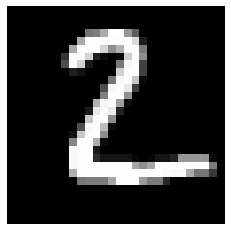

Prediction:  1


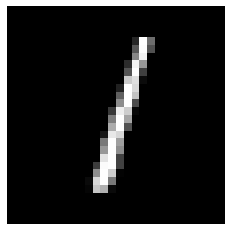

Prediction:  0


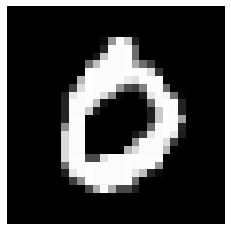

Prediction:  4


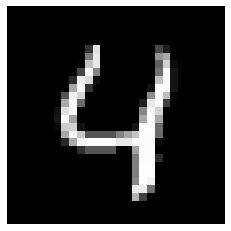

In [ ]:
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow
import torch

# Setup GPU Device
device = torch.device("cpu")
if torch.cuda.is_available():
    device = torch.device("cuda:0")

# Define model structure
md = Net()
# Load weights
weights = torch.load(path2weigths)
# Set weigths
md.load_state_dict(weights)
md = md.to(device)
# Check weights
#print(next(md.parameters()))

# Get data
val_data = datasets.MNIST("./dataset", train=False, download=True)
x_val, y_val = val_data.data, val_data.targets

# Prediction
for i in range(0,5):
    #i = 20
    x = x_val[i]
    x = x.unsqueeze(0)
    x = x.unsqueeze(0)
    x = x.type(torch.float32)
    x = x.to(device)
    output = md(x)
    pred = output.argmax(dim=1, keepdim=False).item()
    print("Prediction: ", pred)
    xplot = x.to("cpu").numpy()[0][0]
    plt.imshow(xplot, cmap="gray")
    plt.axis("off")
    plt.show()